In [1]:
import numpy as np
#from scipy.interpolate import RectBivariateSpline
import scipy.interpolate as interpolate
import datetime as dt
import os
from copy import deepcopy as cp
import netCDF4 as nc
import sys
from dask import delayed
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#import warnings
# Import writer class from csv module
from csv import writer
import xarray as xr
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

In [2]:
SCENARIO_COMBNATION = ['crop-ctl','frst-ctl','irri-crop']
region_list= ['NAM', 'ESAM', 'SAF', 'SEAS']
scenario_title=['CROP-CTL','FRST-CTL','IRR-CROP']

region_name = [
    "WNA",  # Western North America   
    "EAB",   # Eastern Amazon Basin
    "SCP",  # Southern Congo Periphery    
    "EC"  # Eastern China
]
#number = ['A','B','C','D','E','F','G','H','I','J','K','L']
number = ['a','b','c','d','e','f','g','h','i','j','k','l']

i=0, j=0, WNA
i=1, j=0, EAB
i=2, j=0, SCP
i=3, j=0, EC
i=0, j=1, WNA
i=1, j=1, EAB
i=2, j=1, SCP
i=3, j=1, EC
i=0, j=2, WNA
i=1, j=2, EAB
i=2, j=2, SCP
i=3, j=2, EC


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


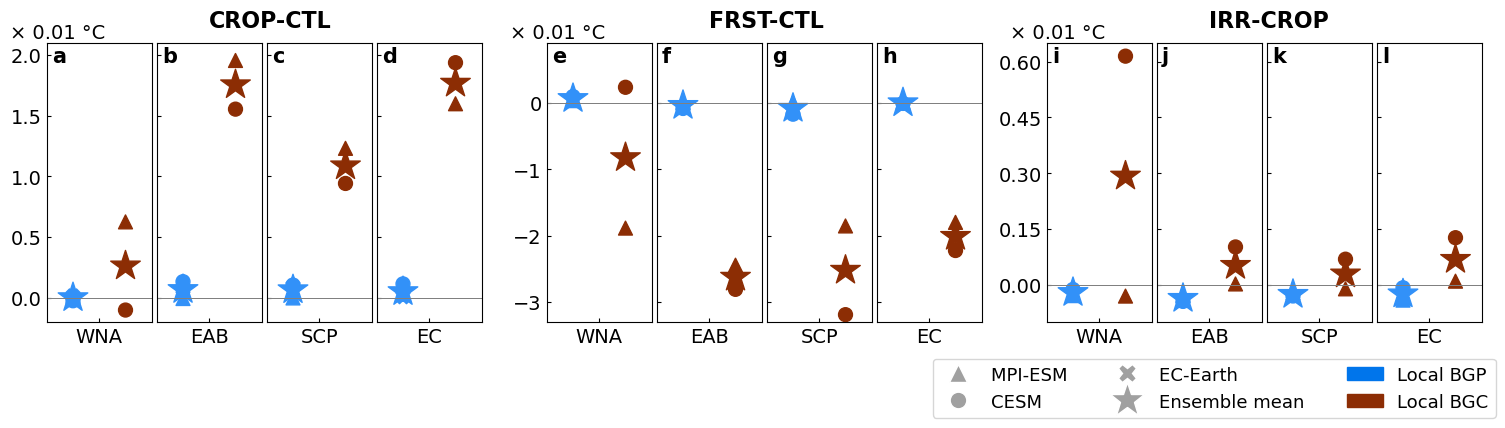

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
fig = plt.figure(constrained_layout= False)
#fig.subplots_adjust(wspace= 10, hspace= 0)
subfigs = fig.subfigures(1, 3,  wspace= 0, hspace= 0)
#subfigs.layout(None)
#subfigs.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout(pad= 0)
fig.set_size_inches(15, 3)
for j, SCENARIO in enumerate(SCENARIO_COMBNATION):
    subfig = subfigs[j]
    ax = subfig.subplots(1, 4, gridspec_kw={'width_ratios': [1, 1, 1, 1]})
    for i, region_source in enumerate(region_list):

        mpiesm_cland_dir_GHG_onglobal = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/Lutdata/TCRE/perarea/' + region_source + \
        '/tas_fldmean_' + SCENARIO + '_mpiesm_Lut_last30mean_chname_' + region_source + '_' + 'GLOBAL' + '.nc')
    
        mpiesm_bgp_dir_tas_region = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/climate/regional_mean/' + \
        'tas_fldmean_' + SCENARIO + '_mpiesm_ensmean_signal-separated_' + region_source + '.nc')
        
        cesm_cland_dir_GHG_onglobal = xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/final_Lunit/RTCRE_regional/perarea/' + region_source + \
        '/tas_fldmean_' + SCENARIO + '_cesm_last30mean_' + region_source + '_GLOBAL' + '.nc')
        
        if SCENARIO == 'irri-crop':
            cesm_bgp_dir_tas_region = xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/harv_cli/final/regional_mean/' + \
                                               '/TREFHT_fldmean_irr-crop_cesm_ensmean_signal-separated_'  + region_source + '.nc')
            ecearth_bgp_dir_tas_region = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/climate/regional_mean/' + \
                                              '/2t_fldmean_irr-crop_ecearth_ensmean_signal-separated_'  + region_source + '_chname.nc')
        else:
            cesm_bgp_dir_tas_region = xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/harv_cli/final/regional_mean/' + \
                                           '/TREFHT_fldmean_' + SCENARIO + '_cesm_ensmean_signal-separated_'  + region_source + '.nc')
            ecearth_bgp_dir_tas_region = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/climate/regional_mean/' + \
                                              '/2t_fldmean_' + SCENARIO + '_ecearth_ensmean_signal-separated_'  + region_source + '_chname.nc')

        if SCENARIO == 'irri-crop' or SCENARIO == 'frst-ctl':
            ecearth3 = [np.nan, np.nan]
        else:
            ecearth3 = [100 * ( ecearth_bgp_dir_tas_region.tas_local.values[0][0][0]/510 ), np.nan]
            
        mpiesm3 = [100 * (mpiesm_bgp_dir_tas_region.tas_local.values[0][0][0]/510), 100 * mpiesm_cland_dir_GHG_onglobal.tas_local.values[0][0][0]]
        cesm3 = [100 * ( cesm_bgp_dir_tas_region.TREFHT_local.values[0][0][0]/510 ), 100 * cesm_cland_dir_GHG_onglobal.tas_local.values[0][0][0]]
        ensemble_arr3 = [cesm3, mpiesm3, ecearth3]
        ensemble3 = np.nanmean(ensemble_arr3, axis=0)
        
        color3 = ['#3291F8', '#8C2D04']
        label3 = ['local\nBGP', 'local\nBGC']
    # Fine-tune the x positions to bring the columns closer and well-centered
        x3 = [1.2, 1.3]  # Adjust the spacing
        x4 = [1.25]  # Adjust the spacing
        # subfig = subfigs[1,j]
        # ax = subfig.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]})
        ax[i].set_position([0.005+0.22*i, 0.000, 0.21, 0.93])
        # ax2.set_position([0.585, 0.000, 0.24, 0.90])
        minv=[-0.2,-3.3,-0.1]   
        maxv=[2.1,0.9,0.65]
        ax[i].set_ylim(minv[j], maxv[j])
        ax[i].axhline(0, color='grey', linewidth=0.7)
        ax[i].yaxis.set_major_locator(MaxNLocator(nbins=5)) # Set the number of y-ticks (e.g., 5)

        ax[i].scatter(x3, ecearth3, marker='X', s=100, color=color3, label='ecearth')
        ax[i].scatter(x3, mpiesm3, marker='^', s=100, color=color3, label='mpiesm')
        ax[i].scatter(x3, cesm3, marker='o', s=100, color=color3, label='cesm')
        ax[i].scatter(x3, ensemble3, marker='*', s=500, color=color3, label='mean')
        ax[i].set_xticks(x4)
        ax[i].tick_params(axis='x', direction='in', length=3, labelsize=12,labelbottom=True)
        #ax[i].set_xticklabels(None, fontsize=13,rotation=10)
        ax[i].set_xlim(1.15, 1.35)  # Tighten the X-axis limits to focus the plot
        ax[i].axhline(0, color='grey', linewidth=0.7)
        print(f"i={i}, j={j}, {region_name[i]}")
        ax[i].set_xticklabels([region_name[i]], fontsize=14)
        ax[i].text(0.05, 0.99,number[4*j+i] , fontsize=15, rotation=0,fontweight='bold',
         verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes)
        if i==0:
            #ax[i].set_ylabel('*0.01$^\circ$C', fontsize=20)
            #× 0.01$^\\circ$C
            #* 0.01$^\circ$C
            ax[i].text(-0.35, 1.07,'× 0.01 °C' , fontsize=14, rotation=0,
     verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes)
            ax[i].tick_params(axis='y', direction='in', length=3, labelsize=14, labelleft=True, labelright=False)
        else:
            if i==1:
                ax[1].text(0.5, 1.08, scenario_title[j], fontsize=16, rotation=0,fontweight='bold',
     verticalalignment='center', horizontalalignment='left', transform=ax[1].transAxes)
                ax[i].tick_params(axis='y', direction='in', length=3, labelsize=14, labelleft=False, labelright=False)
            else:
                ax[i].tick_params(axis='y', direction='in', length=3, labelsize=14, labelleft=False, labelright=False)
                
        all_values_ax = np.concatenate([mpiesm3,cesm3,ecearth3,ensemble3])
        all_values_ax = all_values_ax[np.isfinite(all_values_ax)]
        '''
        for k, txt in enumerate(np.round(ensemble3, decimals=5)):
                ax[i].annotate(txt, (x3[k]-0.05, np.min(all_values_ax)),fontsize=11,rotation=20)
            
        for k, txt in enumerate(np.round(mpiesm3, decimals=5)):
                ax[i].annotate(txt, (x3[k]-0.05, np.min(all_values_ax)+0.5),fontsize=11,rotation=20)
            
        for k, txt in enumerate(np.round(cesm3, decimals=5)):
                ax[i].annotate(txt, (x3[k]-0.05, np.min(all_values_ax)+1),fontsize=11,rotation=20)
            
        for k, txt in enumerate(np.round(ecearth3, decimals=5)):
                ax[i].annotate(txt, (x3[k]-0.05, np.min(all_values_ax)+1.5),fontsize=11,rotation=20)
        '''   
    plt.figure(figsize=(10, 6))  
    
legend_elements = [Line2D([0], [0], marker='^', color='w', label='MPI-ESM ',markerfacecolor='#A0A0A0', markersize=13),
                   Line2D([0], [0], marker='o', color='w', label='CESM ', markerfacecolor='#A0A0A0', markersize=12),
                   Line2D([0], [0], marker='X', color='w', label='EC-Earth ',markerfacecolor='#A0A0A0', markersize=13),
                   Line2D([0], [0], marker='*', color='w', label='Ensemble mean ', markerfacecolor='#A0A0A0', markersize=26),
                   Patch(color='#0075EB', label='Local BGP'),
                   Patch(color='#8C2D04', label='Local BGC'),
                  ] 
font_properties = FontProperties()
font_properties.set_family('serif')  # Set font family
font_properties.set_name('Times New Roman')  # Specific font name
#font_properties.set_weight('bold')  # Set font weight to bold
font_properties.set_size(13)  # Set font size

fig.legend(handles=legend_elements, loc='lower center',bbox_to_anchor=(0.78, -0.35),ncol=3,prop=font_properties )  

#fig.savefig('/work/bm1147/b380949/web-monitoring/secP/Fig4_Globalstakeholder/' + 'NC-FigS6_globalStakeholder_regional2GMT.jpg', format = 'jpg', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig.savefig('/scratch/b/b380949/' + 'NC-FigS6_globalStakeholder_regional2GMT.pdf', format = 'pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)
#fig.savefig('/work/bm1147/b380949/web-monitoring/secP/Fig4_Globalstakeholder/' + 'supple_globalStakeholder_regional2GMT_withdata.png', format = 'png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    # ax1.legend([rects1,rects3,rects5,rects10], ['mpiesm','cesm','ecearth','mean'], fontsize = 20)